# Scikit Learn

# Régression sur le prix des maisons à boston

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [64]:
X.shape

(506, 13)

## 2) separer le jeu d'apprentissage du jeu de test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


## 3) Standardiser les valeurs

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut filtrer que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
exemple : Support Vector Machine

None, to use the default 5-fold cross validation

In [9]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

In [10]:
from sklearn.model_selection import  cross_val_score
cross_val_score(svr, X, y, n_jobs=-1)

array([0.77285459, 0.72771739, 0.56131914, 0.15056451, 0.08212844])

## 5) aller au delà des paramètres par défaut avec un grid search

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {'gamma' : [0.01, 0.1, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.5531050216334196 SVR(gamma=0.1)


## 5.1) affiner le grid search

n_jobsint, default=None

    Number of jobs to run in parallel. Training the estimator and computing the score are parallelized over the cross-validation splits. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.


In [12]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.6011000385319514 SVR(C=1.5, gamma=0.1)


In [13]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.6811868539916419 SVR(C=2.5, gamma=0.05)


In [14]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7205692542786821 SVR(C=4, degree=1, gamma=0.05)


In [15]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7582252839042802 SVR(C=7, degree=1, gamma=0.07)


In [16]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.8016033314072007 SVR(C=30, degree=1, epsilon=0.01, gamma=0.03)


In [17]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.8089416238959677 SVR(C=200, degree=1, epsilon=1.5, gamma=0.03)


In [18]:
# Exercice => tester vos propres paramètres

# On aurait pu faire une fonction de test : 

In [19]:
def test_hyperparametres(hyperparametres):
    grid       = GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_
    

In [20]:
hyperparametres = {  'gamma' : [0.01, 0.1, 0.5, 0.015]          ,
                  "kernel" : ['linear', 'poly', 'rbf', 'sigmoid',  ],
                  "C" : [105, 200]}
test_hyperparametres(hyperparametres)

0.809210503496605 SVR(C=200, gamma=0.015)


(0.809210503496605, SVR(C=200, gamma=0.015))

In [21]:
from sklearn.linear_model import Lasso

In [22]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [23]:
algo = Lasso()
params = {"max_iter" : [ 1000],
         "alpha" : [0.1], 
         "selection": ["random", "cyclic"]}
grid       = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)    


0.6618541038399973 Lasso(alpha=0.1)


# Import de xgboost

In [24]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!brew install libomp

/bin/bash: brew: command not found


In [26]:
from xgboost import XGBRegressor
algo = XGBRegressor()

In [27]:
default_hyperparameters = algo.get_params()
espace_de_Recherche = {}
for i, hyperparam in enumerate(default_hyperparameters):
    default_value = default_hyperparameters[hyperparam]
    if default_value:
        if type(default_value) == int:
            delta = default_value * 2
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == float:
            delta = default_value * 0.1
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == bool:
            valeurs_de_recherches = [True, False]
        espace_de_Recherche[hyperparam]=valeurs_de_recherches
        print(hyperparam, default_value, valeurs_de_recherches)
espace_de_Recherche["n_jobs"]=[-1]

base_score 0.5 [0.45, 0.5, 0.55]
booster gbtree [0.45, 0.5, 0.55]
colsample_bylevel 1 [-1, 1, 3]
colsample_bynode 1 [-1, 1, 3]
colsample_bytree 1 [-1, 1, 3]
importance_type gain [-1, 1, 3]
learning_rate 0.1 [0.09, 0.1, 0.11000000000000001]
max_depth 3 [-3, 3, 9]
min_child_weight 1 [-1, 1, 3]
n_estimators 100 [-100, 100, 300]
n_jobs 1 [-1, 1, 3]
objective reg:linear [-1, 1, 3]
reg_lambda 1 [-1, 1, 3]
scale_pos_weight 1 [-1, 1, 3]
subsample 1 [-1, 1, 3]
verbosity 1 [-1, 1, 3]


In [28]:
def test_hyperparametres(algo, hyperparametres):
    grid       = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [29]:
espace_de_Recherche = {
    "max_depth" : [1,5,10],
    "gamma" : [0.5, 1, 1.1, 1.2, 1.5]
}
test_hyperparametres(XGBRegressor(), espace_de_Recherche)

[16:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8058063518106554 XGBRegressor(gamma=1.1, max_depth=5)


(0.8058063518106554, XGBRegressor(gamma=1.1, max_depth=5))

In [30]:
modele = algo.fit(X_train, y_train)

modele.score(X_test, y_test)

[16:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.929326562751371

# 6) tester tous les algorithmes

In [31]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [32]:
algos = get_sklearn_algorithms()
algos

defaultdict(list,
            {'feature_extraction': [sklearn.feature_extraction._dict_vectorizer.DictVectorizer,
              sklearn.feature_extraction._hash.FeatureHasher],
             'linear_model': [sklearn.linear_model._bayes.ARDRegression,
              sklearn.linear_model._bayes.BayesianRidge,
              sklearn.linear_model._coordinate_descent.ElasticNet,
              sklearn.linear_model._coordinate_descent.ElasticNetCV,
              sklearn.linear_model._glm.glm.GammaRegressor,
              sklearn.linear_model._huber.HuberRegressor,
              sklearn.linear_model._least_angle.Lars,
              sklearn.linear_model._least_angle.LarsCV,
              sklearn.linear_model._coordinate_descent.Lasso,
              sklearn.linear_model._coordinate_descent.LassoCV,
              sklearn.linear_model._least_angle.LassoLars,
              sklearn.linear_model._least_angle.LassoLarsCV,
              sklearn.linear_model._least_angle.LassoLarsIC,
              sklearn.

## Liste les algorithmes

In [33]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> feature_extraction
DictVectorizer,FeatureHasher

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,PoissonRegressor,QuantileRegressor,RANSACRegressor,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDOneClassSVM,SGDRegressor,TheilSenRegressor,TweedieRegressor

===> model_selection
GridSearchCV,RandomizedSearchCV

===> preprocessing
Binarizer,FunctionTransformer,KBinsDiscretizer,KernelCenterer,LabelBinarizer,LabelEncoder,MaxAbsScaler,MinMaxScaler,MultiLabelBinarizer,Normalizer,OneHotEncoder,OrdinalEncoder,PolynomialFeatures,PowerTransformer,QuantileTransformer,RobustScaler,SplineTransformer,StandardScaler

===> 

## supprimer les warnings dans jupyter

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Utiliser chaque algo et conserver les performances

In [35]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Bayesian ARD regression.
0.7792447926802762
Bayesian ridge regression
0.773508387066803
Linear regression with co
0.6809703789834461
Elastic Net model with it
0.7752825662231468
Generalized Linear Model
0.7095283680301951
Linear regression model t
0.8091197905758085
Least Angle Regression mo
0.7709142782479056
Cross-validated Least Ang
0.7733915458474633
Linear Model trained with
0.7026883982919312
Lasso linear model with i


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

0.7756242478620907
Lasso model fit with Leas
-6.801927034949529e-07
Cross-validated Lasso, us
0.7756867110475032
Lasso model fit with Lars
0.7709142782479056
Ordinary least squar
0.7709142782479051
Logistic Regression
Algo de classification
Logistic Regression CV (a
Algo de classification
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCVCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCVCV
Orthogonal Matching Pursu
0.5994357454512825
Cross-validated Orthogona
0.734925775905604
Passive Aggressive Classi
Algo de classification
Passive Aggressive Regres
0.5778283311770237
Linear perceptron classif
Algo de classification
Generalized Linear Model
0.8408981975941526
Linear regression model t


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

-0.014021455223118817
RANSAC (RANdom SAmple Con
0.6140036842569613
Linear least squares with
0.7715305842241731
Ridge regression with bui
0.7715305842240381
Classifier using Ridge re
Algo de classification
Ridge classifier with bui
Algo de classification
Linear classifiers (SVM,
Algo de classification
Solves linear One-Class S
'SGDOneClassSVM' object has no attribute 'score'
Linear model fitted by mi
0.7674179734216503
Theil-Sen Estimator
0.6661226128066364
Generalized Linear Model
0.6737400846352355
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Bin continuous data
'KBinsDiscretizer' object has no attribute 'score'
Center an arbitrary kerne
Kernel matrix must be a square matrix. Input is a 
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode target labels 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." 


Linear Support Vector Reg
0.800416186822801
Nu-Support Vector Classif
Algo de classification
Nu Support Vector Regress
0.6732253244271467
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
Algo de classification
Epsilon-Support Vector Re
0.6926656897976223
'module' object is not callable


## meilleur algo

In [36]:
best_algorithm, best_perf

(PoissonRegressor(), 0.8408981975941526)

## Performances de chaque algo :

In [37]:
performances

{'Bayesian ARD regression.': [0.7792447926802762],
 'Bayesian ridge regression': [0.773508387066803],
 'Linear regression with co': [0.6809703789834461],
 'Elastic Net model with it': [0.7752825662231468],
 'Generalized Linear Model': [0.6737400846352355],
 'Linear regression model t': [0.8091197905758085],
 'Least Angle Regression mo': [0.7709142782479056],
 'Cross-validated Least Ang': [0.7733915458474633],
 'Linear Model trained with': [0.7026883982919312],
 'Lasso linear model with i': [0.7756242478620907],
 'Cross-validated Lasso, us': [0.7756867110475032],
 'Lasso model fit with Lars': [0.7709142782479056],
 'Ordinary least squar': [0.7709142782479051],
 'Orthogonal Matching Pursu': [0.5994357454512825],
 'Cross-validated Orthogona': [0.734925775905604],
 'Passive Aggressive Regres': [0.5778283311770237],
 'RANSAC (RANdom SAmple Con': [0.6140036842569613],
 'Linear least squares with': [0.7715305842241731],
 'Ridge regression with bui': [0.7715305842240381],
 'Linear model fitted

## on manipule les performances via panda

In [38]:
import pandas as pd

In [39]:
df = pd.DataFrame(performances).T

In [40]:
col_name = "performance"
df.columns = [col_name]

In [41]:
df.performance.sort_values()
df

,performance
Bayesian ARD regression.,0.779245
Bayesian ridge regression,0.773508
Linear regression with co,0.680970
Elastic Net model with it,0.775283
Generalized Linear Model,0.673740
Linear regression model t,0.809120
Least Angle Regression mo,0.770914
Cross-validated Least Ang,0.773392
Linear Model trained with,0.702688
Lasso linear model with i,0.775624


## calcul des gains de performance d'un algo l'autre

In [42]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [43]:
#

In [44]:
df

,performance,gains
Bayesian ARD regression.,0.779245,0.00
Bayesian ridge regression,0.773508,-0.74
Linear regression with co,0.680970,-11.96
Elastic Net model with it,0.775283,13.85
Generalized Linear Model,0.673740,-13.10
Linear regression model t,0.809120,20.09
Least Angle Regression mo,0.770914,-4.72
Cross-validated Least Ang,0.773392,0.32
Linear Model trained with,0.702688,-9.14
Lasso linear model with i,0.775624,10.38


## Tracer les performances par algo

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [46]:
df = df.drop("gains", axis=1)

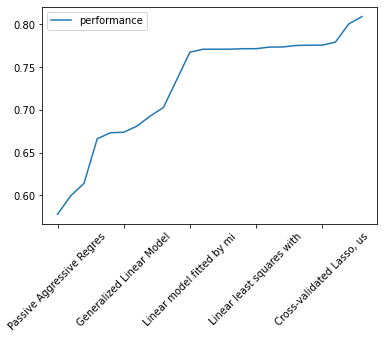

In [47]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

### Augmentation du nombre de légend

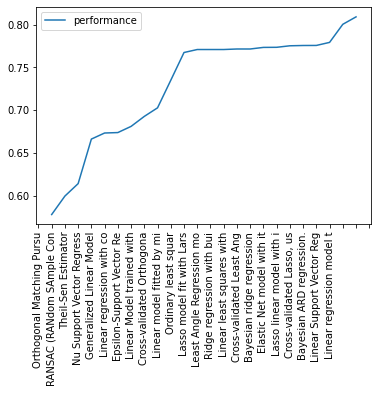

In [48]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

### Rotation des infos sur x, et image plus large

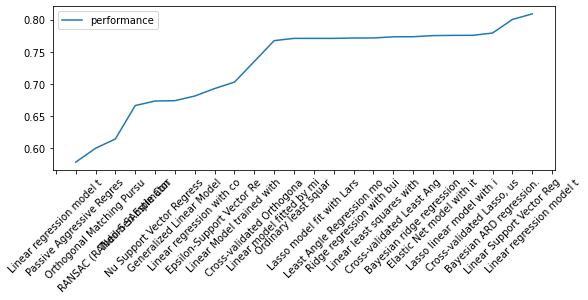

In [49]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


### affichage en barre

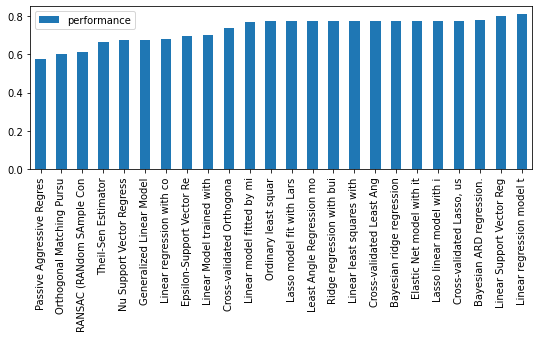

In [50]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

## on rajoute la perforamnce dans les labels

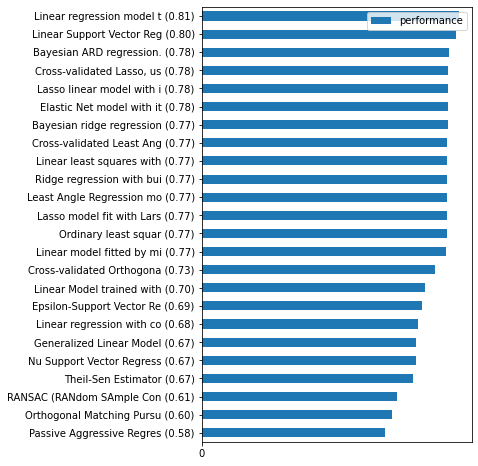

In [51]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

## on récupère les fonctions de score

In [52]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [53]:
scoring_modules = get_sklearn_score_functions(False)

In [65]:
scoring_modules

defaultdict(list,
            {'metrics': [<module 'sklearn.metrics._scorer' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py'>,
              <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
              <function sklearn.metrics.cluster._supervised.adjusted_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')>,
              <function sklearn.metrics.cluster._supervised.adjusted_rand_score(labels_true, labels_pred)>,
              <function sklearn.metrics._ranking.average_precision_score(y_true, y_score, *, average='macro', pos_label=1, sample_weight=None)>,
              <function sklearn.metrics._classification.balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)>,
              <function sklearn.metrics._classification.brier_score_loss(y_true, y_prob, *, sample_weight=None, pos_label=None)>,
              <function sklearn.metrics.cluster._unsu

In [54]:
scoring_modules.keys()

dict_keys(['metrics', 'model_selection'])

## on s'intéresse aux métriques

In [55]:
scoring_modules["metrics"]

[<module 'sklearn.metrics._scorer' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py'>,
 <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics.cluster._supervised.adjusted_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')>,
 <function sklearn.metrics.cluster._supervised.adjusted_rand_score(labels_true, labels_pred)>,
 <function sklearn.metrics._ranking.average_precision_score(y_true, y_score, *, average='macro', pos_label=1, sample_weight=None)>,
 <function sklearn.metrics._classification.balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)>,
 <function sklearn.metrics._classification.brier_score_loss(y_true, y_prob, *, sample_weight=None, pos_label=None)>,
 <function sklearn.metrics.cluster._unsupervised.calinski_harabasz_score(X, labels)>,
 <function sklearn.metrics._classification.cohen_kappa_score(y1, y2, *, labels=None, we

# 8) tester les métriques sur un algo

In [56]:
from sklearn.ensemble import BaggingRegressor

# 8.1) l'algo a des performances variables

In [57]:
performances = {}
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print (i, performance)
    performances[i] = [performance]

0 0.9172412572592309
1 0.8840344863697682
2 0.8926891710040106
3 0.9066101520823071
4 0.8895351399629267
5 0.8827396213504894
6 0.881872677547163
7 0.8967976822423502
8 0.8960428087977551
9 0.9028003674560386


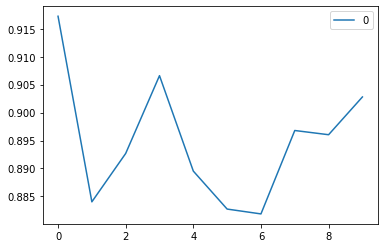

In [58]:
pd.DataFrame.from_dict(performances).T.plot()

## On peut calculer diverses métriques

In [59]:
y_pred = algorithme.predict(X_test)

In [60]:
score_par_metric = {}
for scoring_function in scoring_modules["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print (nom_metrique, " => ", score_algo)
    except:
        pass

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


adjusted_mutual_info_score  =>  -0.00031595336753772384
adjusted_rand_score  =>  -0.0002779685842044352
completeness_score  =>  0.92594489175767
d2_tweedie_score  =>  0.9028003674560386
explained_variance_score  =>  0.9034400677954508
fowlkes_mallows_score  =>  0.0
homogeneity_score  =>  0.9964975541842269
mutual_info_score  =>  4.72360738614985
normalized_mutual_info_score  =>  0.9599265995126537
r2_score  =>  0.9028003674560386
rand_score  =>  0.9961041771877931
v_measure_score  =>  0.9599265995126538


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

## on les manipule dans une dataframe pandas

In [61]:
df_metriques = pd.DataFrame.from_dict(score_par_metric).T

In [62]:
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.sort_values(colonne_de_score)

,score
adjusted_mutual_info_score,-0.000316
adjusted_rand_score,-0.000278
fowlkes_mallows_score,0.000000
d2_tweedie_score,0.902800
r2_score,0.902800
explained_variance_score,0.903440
completeness_score,0.925945
normalized_mutual_info_score,0.959927
v_measure_score,0.959927
rand_score,0.996104


## on peut les dessiner

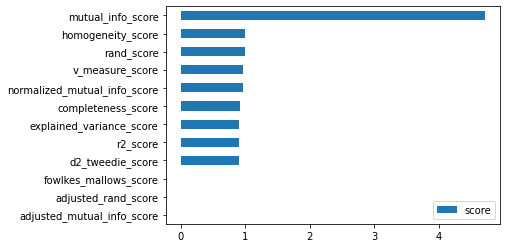

In [63]:
df_metriques.sort_values(by=colonne_de_score).plot(kind="barh")

# on s'intéresse en général au r2 et à la variance expliquée